# Machine Learning technique on PET block detector development - Part 2-2

## Crystal/Pixel discrimination for DQS PET block detector using Machine Learning techniques (v1.0, 2019-09)   
## (Continued from Part 2-1)
### SVM extra test - part 2, all kernels fitting; accuracy, fitting time as data set length testing
* In this extra test, we will test the performance of the SVM classifier with the different set length of the data using different kernels.
---

In [2]:
# load libraries

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib qt
%matplotlib inline
# %matplotlib notebook

import pickle
from sklearn.externals import joblib
from sklearn import metrics
import time
from sklearn.svm import SVC

In [3]:
plt.rcParams['figure.dpi'] = 120 # default is 72


# re-load data

file = "D:\\ML on PET block\\new_concept_block_lso\\new_concept_block_15x15\\results\\ML_data\\new_concept_block_15x15_sorted_events1.csv"
df0 = pd.read_csv (file, comment='#')

X = df0.iloc[:,4:].values
decoding = df0.iloc[:,0:4].values

E_top = X[:,0:18]
E_bottom = X[:,18:36]

E_x1 = E_top[:, 0:18:2]
E_x2 = E_top[:, 18:0:-2]

E_y1 = E_bottom[:, 0:18:2]
E_y2 = E_bottom[:, 18:0:-2]

E_left = np.sum(E_x1, axis = 1)
E_right = np.sum(E_x2, axis = 1)

E_front = np.sum(E_y1, axis = 1)
E_back = np.sum(E_y2, axis = 1)

infile = open('./pickle/temp_data1','rb')
X_t, X_b, X_a, X_g, X_c, index_train, index_test = pickle.load(infile)
infile.close()


# pixel_xy = np.array(df0['index_y'] * 15 + df0['index_x'])
pixel_x = np.array(df0['index_x'])
pixel_y = np.array(df0['index_y'])
pixel_xy = pixel_y * 15 + pixel_x

pixel_x_train = pixel_x[index_train]
pixel_y_train = pixel_y[index_train]
pixel_xy_train = pixel_xy[index_train]

pixel_x_test = pixel_x[index_test]
pixel_y_test = pixel_y[index_test]
pixel_xy_test = pixel_xy[index_test]

In [4]:
def svm_test1 (kernel='linear', \
    fitting_data_length_range = [100,200], \
    testing_data_length = 1000):

    accuracy = []
    fitting_time = []
    pred_time = []
    svm_model = []

    for fitting_data_length in fitting_data_length_range:

        print('Fitting data length: %d' % (fitting_data_length))

        #clf1 = test_svm1(X, pixel_xy, index_train[:fitting_data_length], index_test[:testing_data_length], kernel='linear')
        X_train = X[index_train[:fitting_data_length]]
        X_test = X[index_test[:testing_data_length]]
        y_train = pixel_xy[index_train[:fitting_data_length]]
        y_test = pixel_xy[index_test[:testing_data_length]]

        t0 = time.time()
        clf = SVC(kernel=kernel, random_state=1, gamma='auto')
        clf.fit(X_train, y_train)
        svm_model.append(clf)
        t1 = time.time()
        fitting_time.append(t1-t0)
        print('  Fitting time %f sec'%(t1-t0))

        y_pred = clf.predict(X_test)
        t2 = time.time()
        pred_time.append(t2-t1)
        print('  Predicting time for %d data is %f sec'%(testing_data_length, t2-t1))

        accuracy.append(sum(y_test==y_pred) / y_test.size)
        print('  accuracy score: %f' % (metrics.accuracy_score(y_test, y_pred)))

#        plot_svm_result(kernel, fitting_data_length_range, accuracy, fitting_time, pred_time)
        
    return accuracy, fitting_time, pred_time, svm_model

In [5]:
# plot accuracy as funtion of traning data set length
def plot_svm_result(kernel, fitting_data_length_range, accuracy, fitting_time, pred_time, fileprex):
    
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    fig.suptitle('SVM, kernel=' + kernel)
    
    ax[0].plot(fitting_data_length_range, accuracy, 'o-')
    ax[0].set_xlabel('Fitting data length')
    ax[0].set_ylabel('Accuracy of the testing data')

    color1 = 'tab:red'
    l1 = ax[1].plot(fitting_data_length_range, fitting_time, 'o-', color=color1)
    ax[1].set_xlabel('Fitting data length')
    ax[1].set_ylabel('Time (s)')
    #ax[1].legend( (l1,l2), ('fitting', 'testing'), loc='upper left', shadow=True)
    ax[1].tick_params(axis='y', labelcolor=color1)

    color2 = 'tab:blue'
    ax[1].legend( (l1), ('fitting'), loc='upper left', shadow=True)
    ax2 = ax[1].twinx()
    l2 = ax2.plot(fitting_data_length_range, pred_time,'s-', color=color2)
    ax2.legend( (l2), ('test'), loc='lower right', shadow=True)
    ax2.tick_params(axis='y', labelcolor=color2)

    filename = fileprex + kernel + '.png'
    plt.savefig(filename, dpi=300)

    plt.show()


In [6]:
def save_model(fitting_data_length, svm_model, fileprex, kernel):
    
    filename = fileprex+kernel+'.pkl'
    datafile = open(filename,'wb')
    temp_data = [fitting_data_length, svm_model]
    pickle.dump(temp_data, datafile)
    datafile.close()


Fitting data length: 200
  Fitting time 0.046873 sec
  Predicting time for 1000 data is 0.109372 sec
  accuracy score: 0.183000
Fitting data length: 400
  Fitting time 0.093849 sec
  Predicting time for 1000 data is 0.203114 sec
  accuracy score: 0.277000
Fitting data length: 600
  Fitting time 0.156252 sec
  Predicting time for 1000 data is 0.359361 sec
  accuracy score: 0.344000
Fitting data length: 800
  Fitting time 0.187490 sec
  Predicting time for 1000 data is 0.500081 sec
  accuracy score: 0.394000
Fitting data length: 1000
  Fitting time 0.218740 sec
  Predicting time for 1000 data is 0.750076 sec
  accuracy score: 0.440000
Fitting data length: 1500
  Fitting time 0.296879 sec
  Predicting time for 1000 data is 1.093807 sec
  accuracy score: 0.524000
Fitting data length: 2000
  Fitting time 0.390727 sec
  Predicting time for 1000 data is 1.109431 sec
  accuracy score: 0.566000
Fitting data length: 2500
  Fitting time 0.453112 sec
  Predicting time for 1000 data is 1.406418 sec

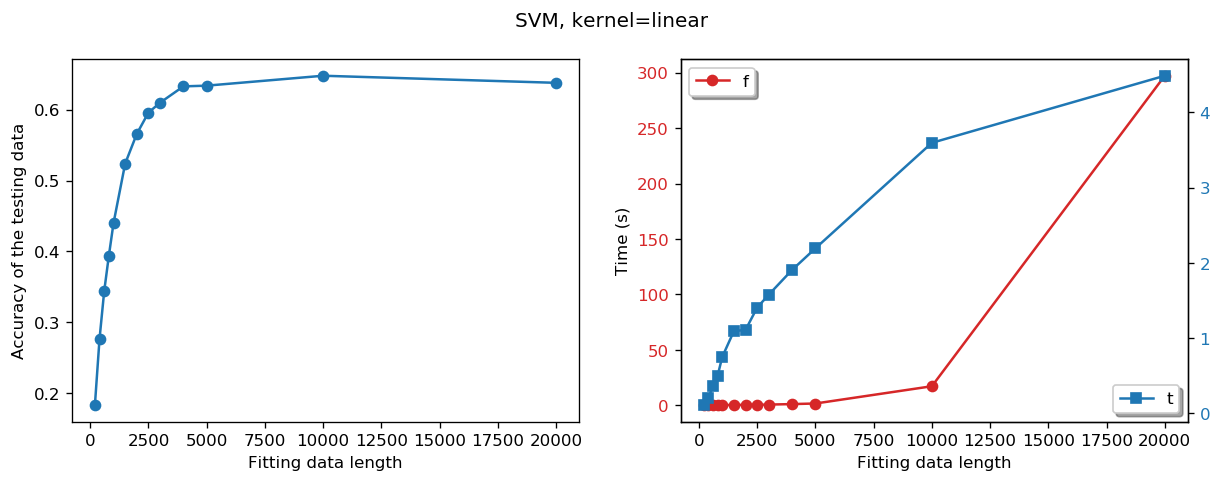

Fitting data length: 200
  Fitting time 0.062503 sec
  Predicting time for 1000 data is 0.093747 sec
  accuracy score: 0.007000
Fitting data length: 400
  Fitting time 0.124997 sec
  Predicting time for 1000 data is 0.234367 sec
  accuracy score: 0.006000
Fitting data length: 600
  Fitting time 0.234484 sec
  Predicting time for 1000 data is 0.374988 sec
  accuracy score: 0.001000
Fitting data length: 800
  Fitting time 0.343739 sec
  Predicting time for 1000 data is 0.656329 sec
  accuracy score: 0.001000
Fitting data length: 1000
  Fitting time 0.437581 sec
  Predicting time for 1000 data is 0.859352 sec
  accuracy score: 0.003000
Fitting data length: 1500
  Fitting time 0.781339 sec
  Predicting time for 1000 data is 1.265676 sec
  accuracy score: 0.001000
Fitting data length: 2000
  Fitting time 1.250299 sec
  Predicting time for 1000 data is 1.609442 sec
  accuracy score: 0.001000
Fitting data length: 2500
  Fitting time 2.015764 sec
  Predicting time for 1000 data is 2.015789 sec

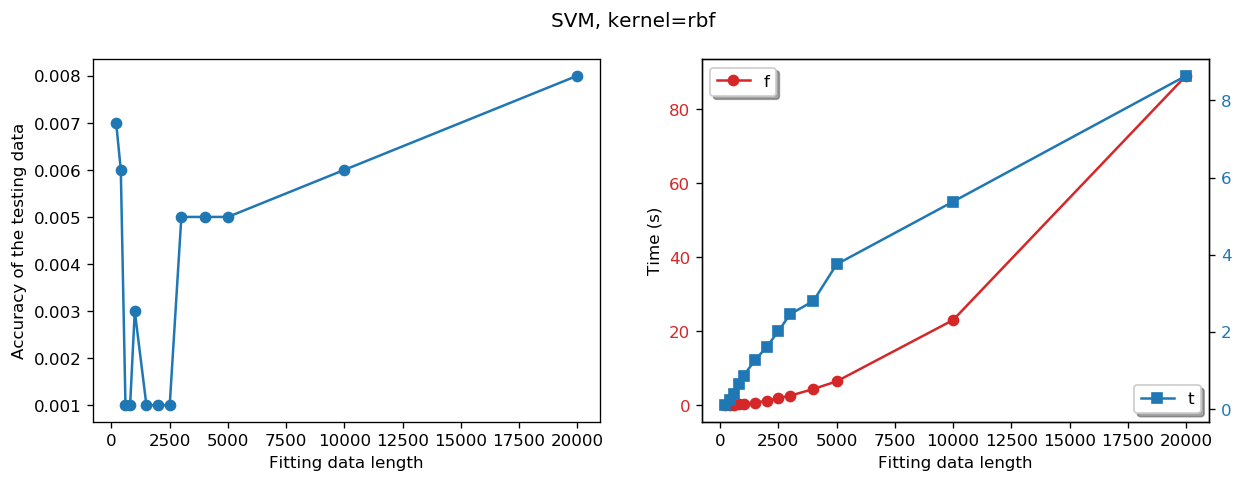

Fitting data length: 200
  Fitting time 0.046881 sec
  Predicting time for 1000 data is 0.109372 sec
  accuracy score: 0.166000
Fitting data length: 400
  Fitting time 0.109364 sec
  Predicting time for 1000 data is 0.203120 sec
  accuracy score: 0.232000
Fitting data length: 600
  Fitting time 0.187498 sec
  Predicting time for 1000 data is 0.343741 sec
  accuracy score: 0.304000
Fitting data length: 800
  Fitting time 0.187497 sec
  Predicting time for 1000 data is 0.609625 sec
  accuracy score: 0.341000
Fitting data length: 1000
  Fitting time 0.218735 sec
  Predicting time for 1000 data is 0.796980 sec
  accuracy score: 0.363000
Fitting data length: 1500
  Fitting time 0.296860 sec
  Predicting time for 1000 data is 1.000092 sec
  accuracy score: 0.433000
Fitting data length: 2000
  Fitting time 0.359466 sec
  Predicting time for 1000 data is 1.296937 sec
  accuracy score: 0.465000
Fitting data length: 2500
  Fitting time 0.468841 sec
  Predicting time for 1000 data is 1.437544 sec

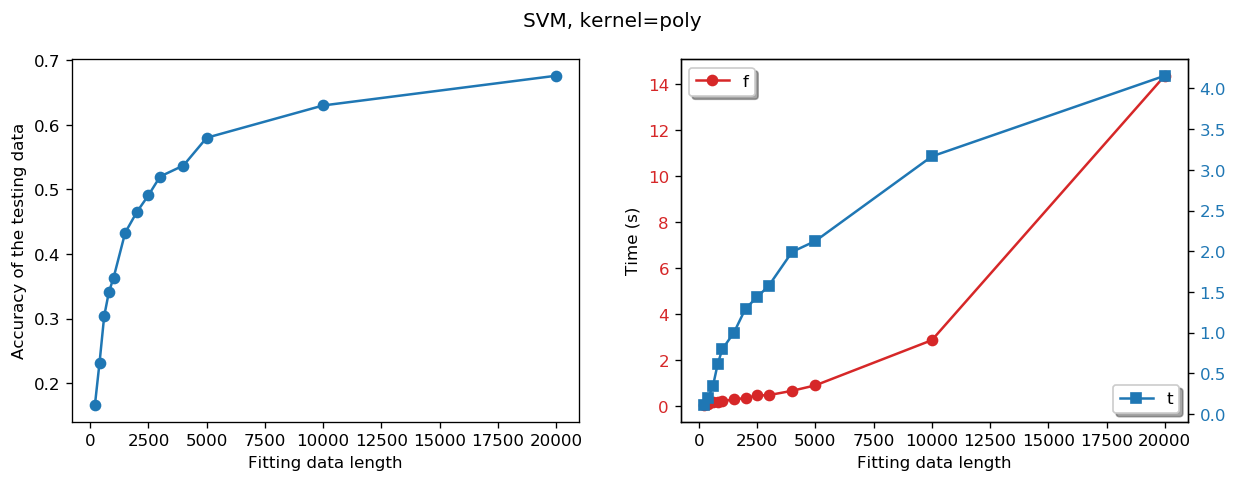

Fitting data length: 200
  Fitting time 0.046868 sec
  Predicting time for 1000 data is 0.093836 sec
  accuracy score: 0.002000
Fitting data length: 400
  Fitting time 0.078120 sec
  Predicting time for 1000 data is 0.171871 sec
  accuracy score: 0.005000
Fitting data length: 600
  Fitting time 0.156252 sec
  Predicting time for 1000 data is 0.296866 sec
  accuracy score: 0.001000
Fitting data length: 800
  Fitting time 0.171879 sec
  Predicting time for 1000 data is 0.437575 sec
  accuracy score: 0.004000
Fitting data length: 1000
  Fitting time 0.234374 sec
  Predicting time for 1000 data is 0.718845 sec
  accuracy score: 0.001000
Fitting data length: 1500
  Fitting time 0.374995 sec
  Predicting time for 1000 data is 1.171937 sec
  accuracy score: 0.003000
Fitting data length: 2000
  Fitting time 0.609452 sec
  Predicting time for 1000 data is 1.421947 sec
  accuracy score: 0.001000
Fitting data length: 2500
  Fitting time 0.796954 sec
  Predicting time for 1000 data is 1.718885 sec

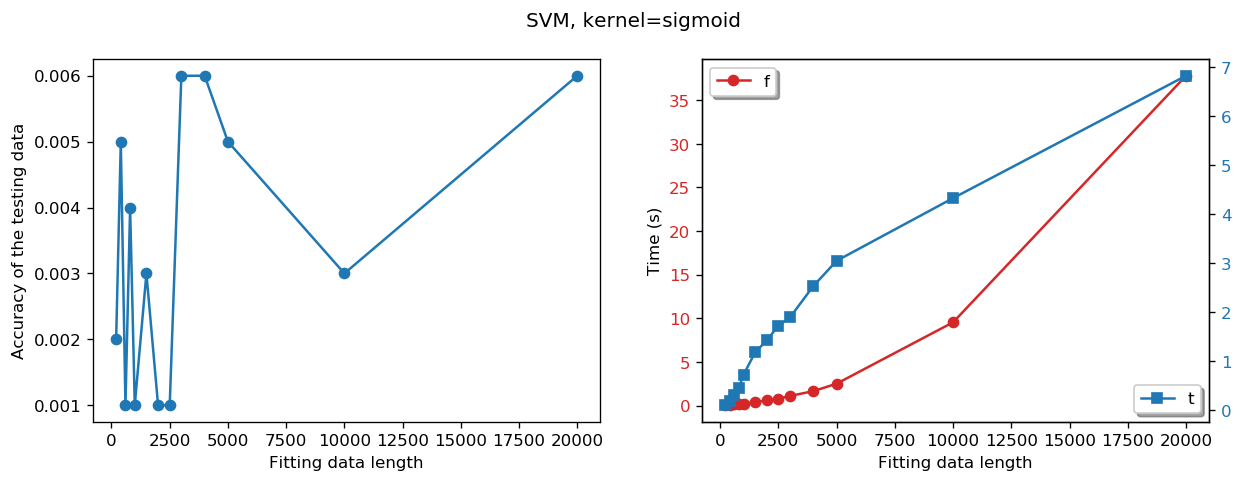

In [78]:

for kernel in ('linear','rbf', 'poly','sigmoid'):
    
    fitting_data_length_range = [200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 10000, 20000]
    #fitting_data_length_range = [200, 400, 600, 800, 1000]
    testing_data_length = 1000

    accu, fitting_time, pred_time, svm_model = svm_test1(kernel=kernel, \
                                                         fitting_data_length_range=fitting_data_length_range, \
                                                         testing_data_length=testing_data_length)

    save_model(fitting_data_length_range, svm_model, fileprex='.//models//svm_',kernel=kernel)
    
    plot_svm_result(kernel=kernel, fitting_data_length_range=fitting_data_length_range, \
                    accuracy=accu, fitting_time=fitting_time, pred_time=pred_time, \
                   fileprex='.//figs2//svm_')


## Conclusion
* <b>1. The kernels of linear and poly produced reasonable results, the accuracies are bettwe than the conventional lookup table method and other ML methods.
* <b>2. The kernels of RBF and sigmoid cannot provide any reasonable results, they don't work with this data set.
* <b>3. The accuracy with lenear kernel saturated at about 10k data set length with the value of 0.648.
* <b>4. The accuracy with poly still increases at 20k data set length with the best value of 0.676.
* <b>5. The fitting time with linear kernel increases very fast when the input data set length increases.

Fitting data length: 10000
  Fitting time 2.484577 sec
  Predicting time for 1000 data is 3.265940 sec
  accuracy score: 0.630000
Fitting data length: 20000
  Fitting time 14.188631 sec
  Predicting time for 1000 data is 4.086729 sec
  accuracy score: 0.676000
Fitting data length: 30000
  Fitting time 49.809282 sec
  Predicting time for 1000 data is 4.392179 sec
  accuracy score: 0.689000
Fitting data length: 40000
  Fitting time 147.064574 sec
  Predicting time for 1000 data is 5.696927 sec
  accuracy score: 0.687000
Fitting data length: 50000
  Fitting time 344.254331 sec
  Predicting time for 1000 data is 6.579672 sec
  accuracy score: 0.709000


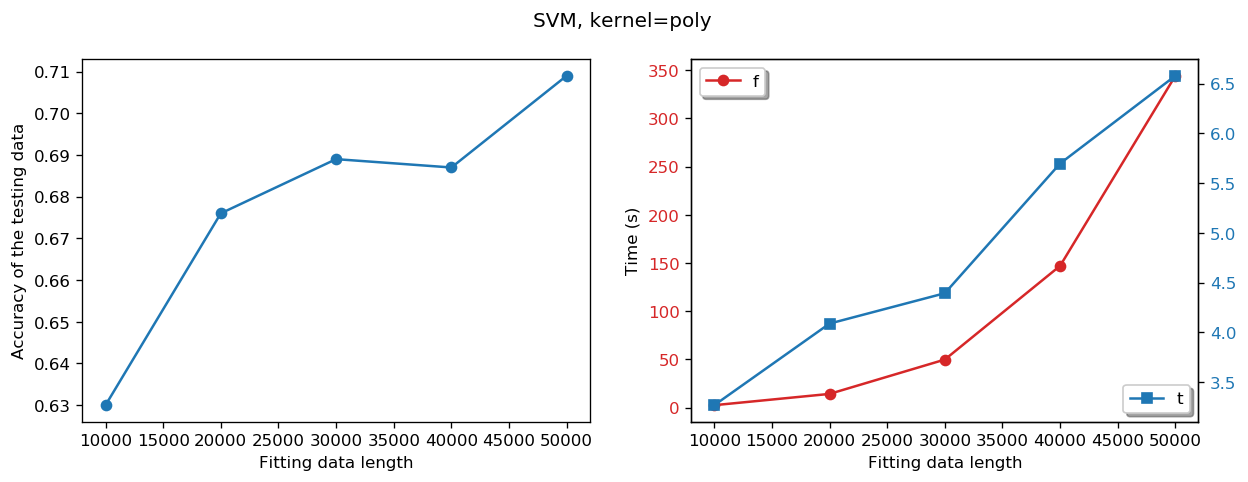

In [7]:
# extra fitting with poly

kernel = 'poly'
    
fitting_data_length_range = [10000, 20000, 30000, 40000, 50000]
testing_data_length = 1000

accu, fitting_time, pred_time, svm_model = svm_test1(kernel=kernel, \
                                                     fitting_data_length_range=fitting_data_length_range, \
                                                     testing_data_length=testing_data_length)

save_model(fitting_data_length_range, svm_model, fileprex='.//models//svm_',kernel=kernel)

plot_svm_result(kernel=kernel, fitting_data_length_range=fitting_data_length_range, \
                accuracy=accu, fitting_time=fitting_time, pred_time=pred_time, \
               fileprex='.//figs2//svm_large_events_')


In [ ]:
# continue on poly fitting
# extra fitting with poly

kernel = 'poly'
    
fitting_data_length_range = [100000, 200000, 300000, 400000, 500000]
testing_data_length = 1000

accu, fitting_time, pred_time, svm_model = svm_test1(kernel=kernel, \
                                                     fitting_data_length_range=fitting_data_length_range, \
                                                     testing_data_length=testing_data_length)

save_model(fitting_data_length_range, svm_model, fileprex='.//models//svm_',kernel=kernel)

plot_svm_result(kernel=kernel, fitting_data_length_range=fitting_data_length_range, \
                accuracy=accu, fitting_time=fitting_time, pred_time=pred_time, \
               fileprex='.//figs2//svm_huge_events_')

Fitting data length: 100000
  Fitting time 5858.480958 sec
  Predicting time for 1000 data is 12.313541 sec
  accuracy score: 0.698000
Fitting data length: 200000


<b>saved output</b>  
***
Fitting data length: 100000  
  Fitting time 5858.480958 sec  
  Predicting time for 1000 data is 12.313541 sec  
  accuracy score: 0.698000 
  ***